## Exercice 1

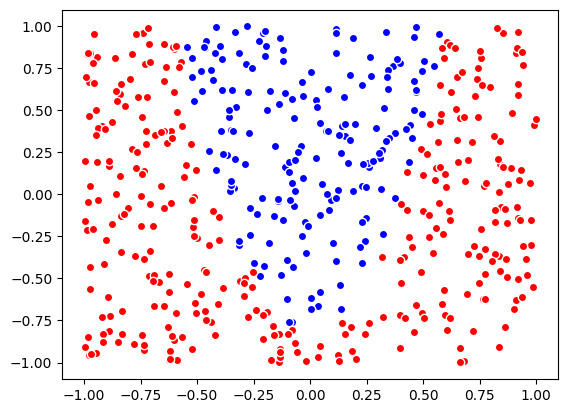

In [2]:
import torch 
import torch.nn.functional as F
import pub_preliminaries as pb

def generate_data_L2C2(nb_samples):
    data_inputs = torch.rand(nb_samples, 2) *2 -1
    weight1 = 5
    weight2 = -1
    intercept = -0.8
    bruit = torch.normal(mean=0.0, std=0.01, size=(nb_samples,))
    data_labels = (weight1* (data_inputs[:, 0])**2 + weight2 * data_inputs[:,1] + intercept + bruit) < 0
    return data_inputs, data_labels

data_inputs, data_labels = generate_data_L2C2(500)
pb.show_data_L2C2(data_inputs, data_labels)

## Exercice 2

In [3]:
def model_ws(X, weights, bias):
    return torch.sigmoid( torch.matmul(X, weights) + bias )
    
def loss_function(actual, predicted):
    epsilon = 1e-7
    prediction = torch.clamp(predicted, epsilon, 1.0 - epsilon)
    return -torch.sum(actual * torch.log(prediction) + (1 - actual) * torch.log(1 - prediction))

def f(weight, bias):
    predicted = model_ws(data_inputs, weight, bias)
    return loss_function(data_labels.long(), predicted) 
    
weights = torch.randn(2, requires_grad=True)
bias = torch.randn(1, requires_grad=True)


In [4]:
def grad_des(weight, bias, lr, epochs):
    for iter in range(epochs):
        
        # Forward pass
        loss = f(weight, bias)
        # Backward pass
        loss.backward()
        
        # Update 
        with torch.no_grad():
            weight -= lr * weight.grad
            bias -=  lr * bias.grad
            # Prevent accumulation by zeroing the grad
            weight.grad.zero_()
            bias.grad.zero_()   

        if iter % 1000 == 0:
            print(f" la perte pour l'epoch {iter} est de : {loss}")
            
    return weight, bias

lr = 0.01
epochs = 10000
weight_des,bias_des=grad_des(weights, bias, lr, epochs)


 la perte pour l'epoch 0 est de : 468.5774230957031
 la perte pour l'epoch 1000 est de : 293.0484313964844
 la perte pour l'epoch 2000 est de : 293.0484313964844
 la perte pour l'epoch 3000 est de : 293.0484313964844
 la perte pour l'epoch 4000 est de : 293.0484313964844
 la perte pour l'epoch 5000 est de : 293.0484313964844
 la perte pour l'epoch 6000 est de : 293.0484313964844
 la perte pour l'epoch 7000 est de : 293.0484313964844
 la perte pour l'epoch 8000 est de : 293.0484313964844
 la perte pour l'epoch 9000 est de : 293.0484313964844


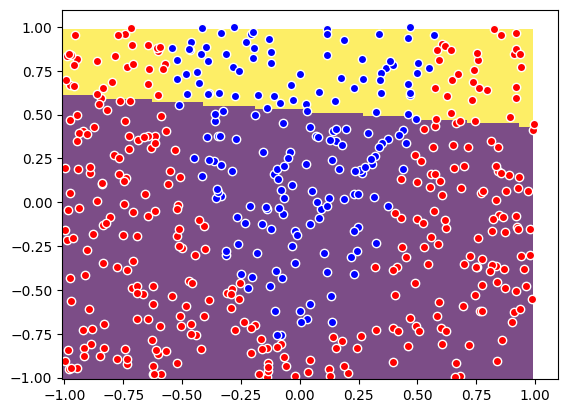

In [5]:
model = lambda x: model_ws(x, weight_des, bias_des)
pb.show_data_L2C2(data_inputs, data_labels, model = model)

## Exercice 3

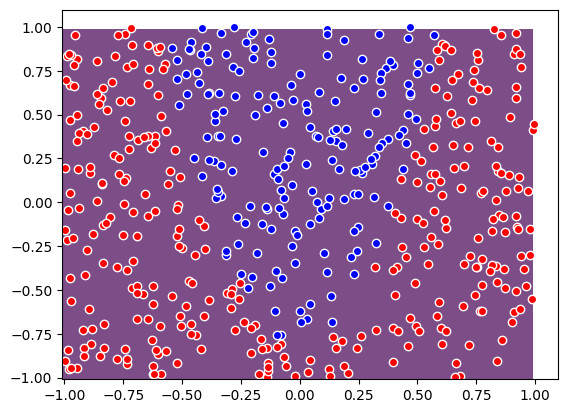

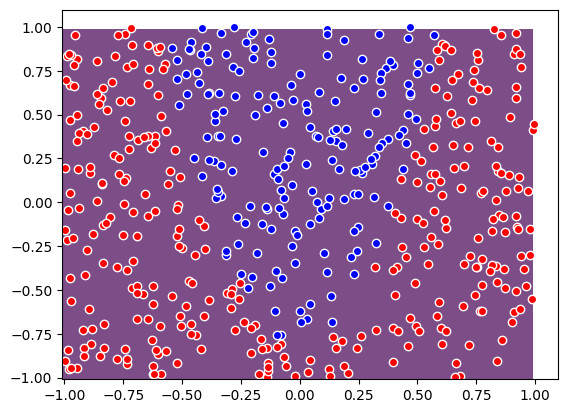

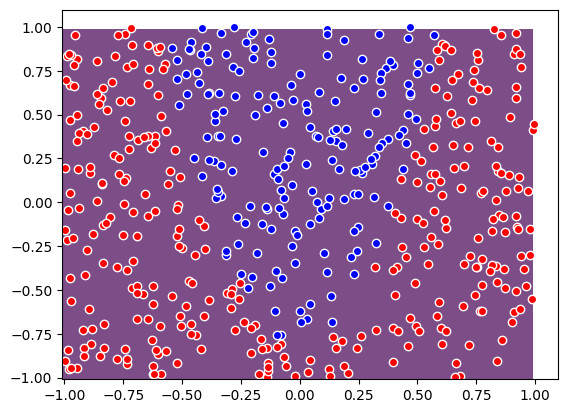

In [6]:
def init(nb_features, nb_hidden_neurons):
    params = {}
    params.update({"hidden_layer_weight": torch.rand(nb_features,nb_hidden_neurons, requires_grad =True)})
    h= torch.randn((nb_features+1, nb_hidden_neurons))/10
    params.update({"hidden_layer_bias": torch.rand(nb_hidden_neurons, requires_grad =True)})
    params.update({"out_layer_weight": torch.rand(nb_hidden_neurons,1, requires_grad=True)})
    params.update({"out_layer_bias": torch.rand(1, requires_grad=True)})
    return params
   
def model(X, parameters):
   
    hidden_output = torch.relu( torch.matmul(X, parameters["hidden_layer_weight"] ) + parameters["hidden_layer_bias"] )
    out_layer_output = torch.sigmoid( torch.matmul(hidden_output,parameters["out_layer_weight"] ) + parameters["out_layer_bias"] )
    return out_layer_output

nb_neurons = [4, 10, 100]
for nb in nb_neurons:
    model_dict = init(2, nb)
    y = lambda x: model(x, model_dict)
    # show data for each nb of neurons/model
    pb.show_data_L2C2(data_inputs, data_labels, model=y)
    

## Exercice 4

In [7]:
def loss_function(actual, predicted):
    epsilon = 1e-7
    prediction = torch.clamp(predicted, epsilon, 1.0 - epsilon)
    return -torch.sum(actual * torch.log(prediction) + (1 - actual) * torch.log(1 - prediction))


def f(params):
    predicted = model(data_inputs, params).reshape(-1)
    return loss_function(data_labels.long(), predicted)    

In [8]:
def grad_des(parameters, lr, epochs):
    param = parameters
    for iter in range(epochs):
        # Forward pass
        loss = f(param)
        # Backward pass
        loss.backward()

        # Update 
        with torch.no_grad():
            param['hidden_layer_weight'] -= lr * param['hidden_layer_weight'].grad
            param['hidden_layer_bias'] -= lr * param['hidden_layer_bias'].grad
            param['out_layer_weight'] -= lr * param['out_layer_weight'].grad
            param['out_layer_bias'] -= lr * param['out_layer_bias'].grad

            # Prevent accumulation by zeroing the grad
            param['hidden_layer_weight'].grad.zero_()
            param['hidden_layer_bias'].grad.zero_()
            param['out_layer_weight'].grad.zero_()
            param['out_layer_bias'].grad.zero_()

        if iter % 1000 == 0:
           print(f"Loss at epoch {iter}: {loss.item()}")

    return param


Loss at epoch 0: 770.8456420898438
Loss at epoch 1000: 293.0484313964844
Loss at epoch 2000: 293.0484313964844
Loss at epoch 3000: 293.0484313964844
Loss at epoch 4000: 293.0484313964844
Loss at epoch 5000: 293.0484313964844
Loss at epoch 6000: 293.0484313964844
Loss at epoch 7000: 293.0484313964844
Loss at epoch 8000: 293.0484313964844
Loss at epoch 9000: 293.0484313964844


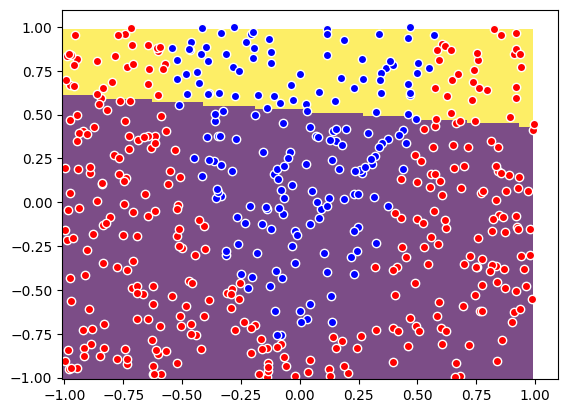

Loss at epoch 0: 1354.8701171875
Loss at epoch 1000: 43.2375602722168
Loss at epoch 2000: 34.35491943359375
Loss at epoch 3000: 32.21542739868164
Loss at epoch 4000: 31.25855255126953
Loss at epoch 5000: 30.705097198486328
Loss at epoch 6000: 30.330890655517578
Loss at epoch 7000: 30.051876068115234
Loss at epoch 8000: 29.83111572265625
Loss at epoch 9000: 29.64858627319336


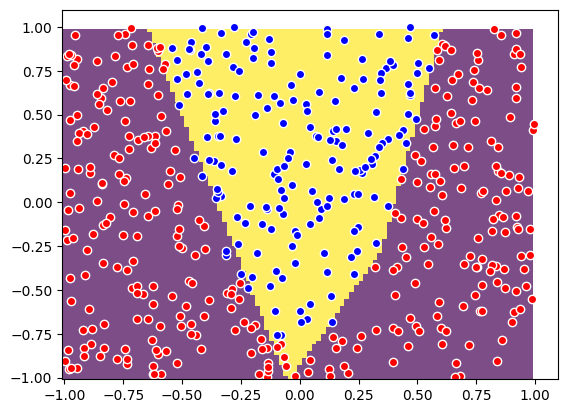

Loss at epoch 0: 4275.87109375
Loss at epoch 1000: 25.404916763305664
Loss at epoch 2000: 16.74205207824707
Loss at epoch 3000: 13.024670600891113
Loss at epoch 4000: 10.87824821472168
Loss at epoch 5000: 9.43412971496582
Loss at epoch 6000: 8.353839874267578
Loss at epoch 7000: 7.514932632446289
Loss at epoch 8000: 6.855319023132324
Loss at epoch 9000: 6.309113502502441


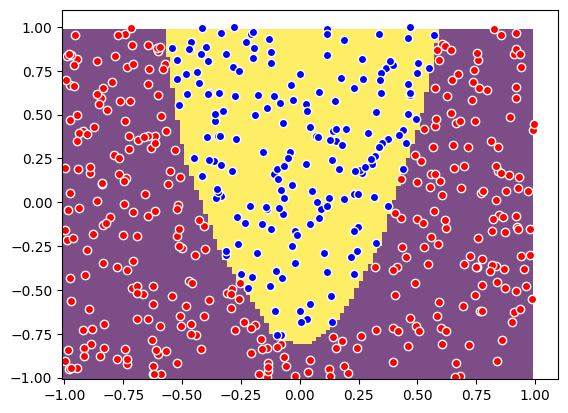

In [9]:
lr = 0.001
epochs = 10000
nb_neurons = [4, 10, 100]
for nb in nb_neurons:
    model_dict = init(2, nb)
    params=grad_des(model_dict, lr, epochs)
    # show data for each nb of neurons/model
    pb.show_data_L2C2(data_inputs, data_labels, model=y)

## Exercice 5

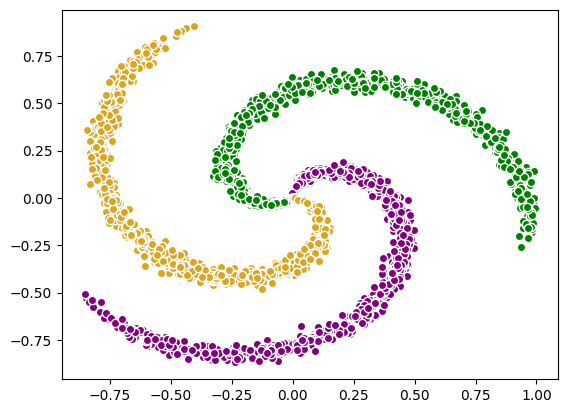

In [10]:
loaded_data = torch.load('pub_database.pt')
data_inputs = loaded_data[0]
data_labels = loaded_data[1]
pb.show_data_L2C3(data_inputs, data_labels)

Loss at epoch 0: 1.5480155944824219
Loss at epoch 1000: 0.393363356590271
Loss at epoch 2000: 0.2124701589345932
Loss at epoch 3000: 0.14760836958885193
Loss at epoch 4000: 0.11385370045900345
Loss at epoch 5000: 0.09313422441482544
Loss at epoch 6000: 0.07913558930158615
Loss at epoch 7000: 0.06909653544425964
Loss at epoch 8000: 0.0615839809179306
Loss at epoch 9000: 0.05574629083275795


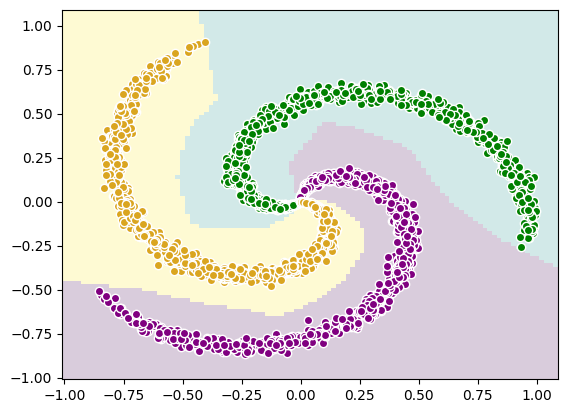

In [11]:
def init(nb_features, nb_hidden_neurons):
    params = {}
    params.update({"hidden_layer_weight": torch.rand(nb_features, nb_hidden_neurons, requires_grad=True)})
    params.update({"hidden_layer_bias": torch.rand(nb_hidden_neurons, requires_grad=True)})
    params.update({"out_layer_weight": torch.rand(nb_hidden_neurons, 3, requires_grad=True)})  
    params.update({"out_layer_bias": torch.rand(3, requires_grad=True)})
    return params

   
def model(X, parameters):
    hidden_output = torch.relu(torch.matmul(X, parameters["hidden_layer_weight"]) + parameters["hidden_layer_bias"])
    out_layer_output = torch.log_softmax(torch.matmul(hidden_output, parameters["out_layer_weight"]) + parameters["out_layer_bias"], dim=1)
    return out_layer_output

def grad_des(parameters, lr, epochs):
    param = parameters
    for iter in range(epochs):
        # Forward pass
        predicted = model(data_inputs, param)
        loss = F.nll_loss(predicted, data_labels.long())
        # Backward pass
        loss.backward()
        
       

        # Update 
        with torch.no_grad():
            param['hidden_layer_weight'] -= lr * param['hidden_layer_weight'].grad
            param['hidden_layer_bias'] -= lr * param['hidden_layer_bias'].grad
            param['out_layer_weight'] -= lr * param['out_layer_weight'].grad
            param['out_layer_bias'] -= lr * param['out_layer_bias'].grad

            # Prevent accumulation by zeroing the grad
            param['hidden_layer_weight'].grad.zero_()
            param['hidden_layer_bias'].grad.zero_()
            param['out_layer_weight'].grad.zero_()
            param['out_layer_bias'].grad.zero_()

        if iter % 1000 == 0:
           print(f"Loss at epoch {iter}: {loss.item()}")

    return param

lr = 0.1
epochs = 10000
model_dict = init(2, 100)
params=grad_des(model_dict, lr, epochs)
y = lambda x: model(x, params)
# show data for each nb of neurons/model
pb.show_data_L2C3(data_inputs, data_labels, model=y)

    

## Exercice 6

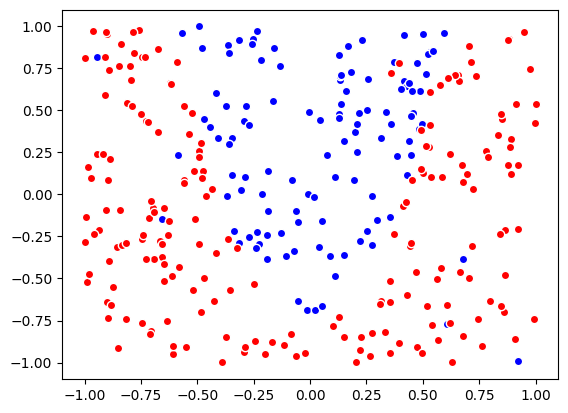

In [21]:
loaded_data = torch.load('weird_parabole.pt')
data_inputs1 = loaded_data[0]
data_labels1 = loaded_data[1]
pb.show_data_L2C2(data_inputs1, data_labels1)

In [22]:
def init(nb_features, nb_hidden_neurons):
    params = {}
    hidden_layer = torch.randn(nb_features, nb_hidden_neurons)/10
    hidden_layer.requires_grad =True
    params["hidden_layer_weight"] = hidden_layer
    hidden_layer_bias = torch.randn(nb_hidden_neurons)/10
    hidden_layer_bias.requires_grad=True
    params["hidden_layer_bias"] = hidden_layer_bias
    out_layer_weight =  torch.randn(nb_hidden_neurons, 1)/10
    out_layer_weight.requires_grad=True
    params["out_layer_weight"] = out_layer_weight
    out_layer_bias = torch.randn(1)/10
    out_layer_bias.requires_grad=True
    params["out_layer_bias"] = out_layer_bias
    return params


In [23]:
model1 = init(2, 100)
model2 = init(2, 100000)
def loss_function2(actual, predicted):
    pred = torch.clamp(predicted, 15, -15)
    return -torch.mean(actual * torch.log(pred) + (1 - actual) * torch.log(1 - pred))

def f(params):
    predicted = model(data_inputs1, params).reshape(-1)
    return loss_function2(data_labels1.long(), predicted)  
    
def grad_des(parameters, lr, epochs):
    param = parameters
    for iter in range(epochs):
        # Forward pass
        loss = f(param)
        #predicted = model(data_inputs1, param).reshape(-1)
        #loss = F.nll_loss(predicted,data_labels1)

        # Backward pass
        loss.backward()
        
       
        # Update 
        with torch.no_grad():
            param['hidden_layer_weight'] -= lr * param['hidden_layer_weight'].grad
            param['hidden_layer_bias'] -= lr * param['hidden_layer_bias'].grad
            param['out_layer_weight'] -= lr * param['out_layer_weight'].grad
            param['out_layer_bias'] -= lr * param['out_layer_bias'].grad

            # Prevent accumulation by zeroing the grad
            param['hidden_layer_weight'].grad.zero_()
            param['hidden_layer_bias'].grad.zero_()
            param['out_layer_weight'].grad.zero_()
            param['out_layer_bias'].grad.zero_()

        if iter % 1000 == 0:
           print(f"Loss at epoch {iter}: {loss.item()}")

    return param
    
params=grad_des(model1, 0.1, 100000)
y = lambda x: model(x, params)
# show data for each 100 of neurons/model
pb.show_data_L2C2(data_inputs1, data_labels1, model=y)
params=grad_des(model2, 0.02, 100000)
y = lambda x: model(x, params)
# show data for each 100 of neurons/model
pb.show_data_L2C2(data_inputs1, data_labels1, model=y)

Loss at epoch 0: nan
Loss at epoch 1000: nan
Loss at epoch 2000: nan
Loss at epoch 3000: nan
Loss at epoch 4000: nan
Loss at epoch 5000: nan
Loss at epoch 6000: nan
Loss at epoch 7000: nan
Loss at epoch 8000: nan
Loss at epoch 9000: nan
Loss at epoch 10000: nan
Loss at epoch 11000: nan
Loss at epoch 12000: nan
Loss at epoch 13000: nan
Loss at epoch 14000: nan
Loss at epoch 15000: nan
Loss at epoch 16000: nan
Loss at epoch 17000: nan
Loss at epoch 18000: nan
Loss at epoch 19000: nan
Loss at epoch 20000: nan
Loss at epoch 21000: nan
Loss at epoch 22000: nan
Loss at epoch 23000: nan
Loss at epoch 24000: nan
Loss at epoch 25000: nan
Loss at epoch 26000: nan
Loss at epoch 27000: nan
Loss at epoch 28000: nan
Loss at epoch 29000: nan
Loss at epoch 30000: nan
Loss at epoch 31000: nan
Loss at epoch 32000: nan


KeyboardInterrupt: 